In [1]:
import os
import cv2
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from detection_utils import updatePoints, drawRoIPoly
from detection_utils import save2File, loadFile, getLaneMask
from detection_utils import warped2BirdPoly, fitLaneLines
from detection_utils import getLanePoints, predictLaneLines
from detection_utils import measureCurveRadius, plotPredictionBoundry

%matplotlib inline

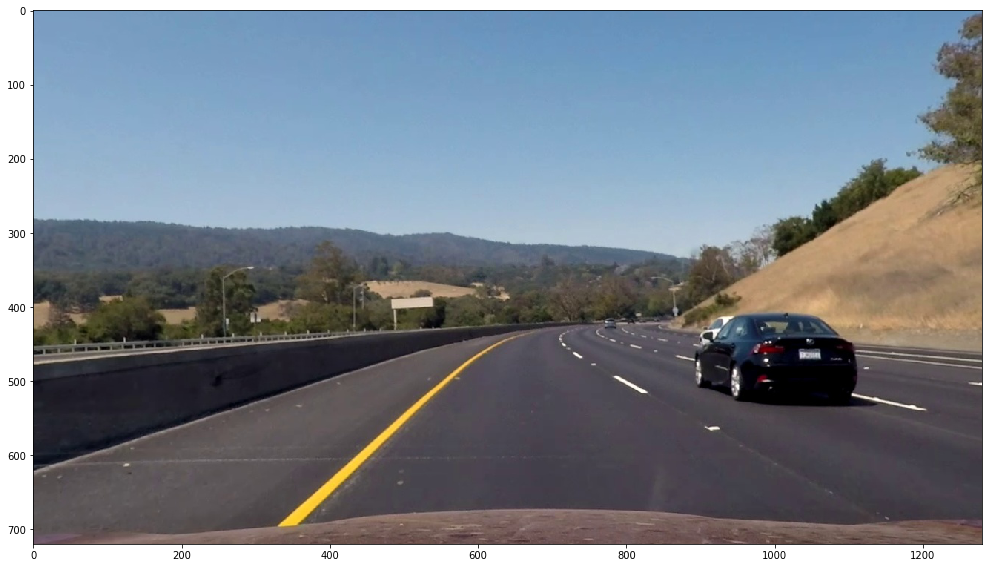

In [2]:
frame = plt.imread("./edge_thresh_calib/frame811.jpg")
plt.figure(figsize=(17, 17))
plt.imshow(frame)

roi is saved!
roi is saved!


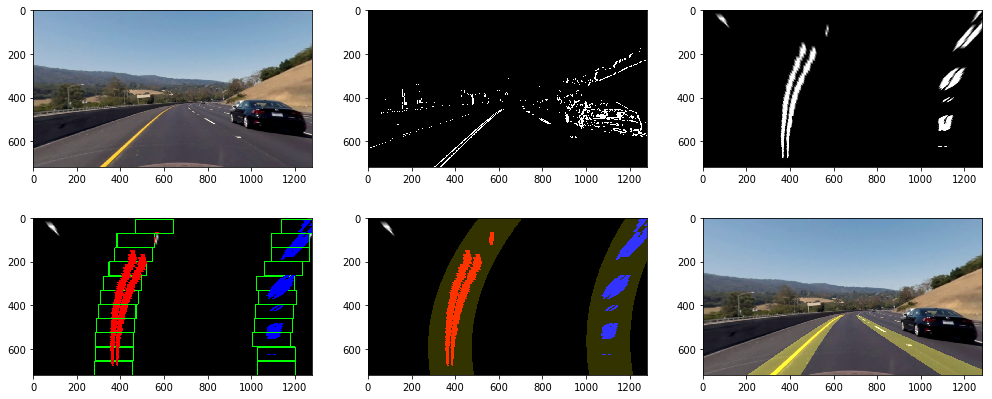

In [7]:
# frame = plt.imread("./edge_thresh_calib/frame558.jpg")
camModel = loadFile("camCalibMatCoeffs")
camMtx = camModel["camMtx"]
dstCoeffs = camModel["dstCoeffs"]
frame = cv2.undistort(frame, camMtx, dstCoeffs, None, camMtx)
displayedFrame = frame.copy()
if os.path.exists("./roiPoly"):
    points = loadFile("./roiPoly")
if points is not None:
#     drawRoIPoly(displayedFrame, points)
    binaryLanes = getLaneMask(frame, 33, 200, 110, 30, 200)
    birdFrame, birdPoint = warped2BirdPoly(binaryLanes, points, 1280, 720)
    boutImg, leftLinePoints, rightLinePoints = getLanePoints(birdFrame, 11, 175, 55, )
    fitLaneLines(leftLinePoints, rightLinePoints, birdFrame.shape[0], 2)
    linesParams = loadFile("./linesFit")
    outImg, leftLine, rightLine = predictLaneLines(birdFrame, linesParams, margin=100)
    outImg, boundryMask = plotPredictionBoundry(outImg, leftLine, rightLine, margin=100)
    M = cv2.getPerspectiveTransform(birdPoint, np.float32(points))
    noutImg = cv2.warpPerspective(boundryMask, M, (1280, 720), cv2.INTER_LINEAR)
    displayedFrame = cv2.addWeighted(displayedFrame, 1, noutImg, 0.3, 0)
# preprocessing result
fig = plt.figure(figsize=(17, 7))
axis = fig.add_subplot(2, 3, 1)
axis.imshow(frame)
axis = fig.add_subplot(2, 3, 2)
axis.imshow(binaryLanes, "gray")
axis = fig.add_subplot(2, 3, 3)
axis.imshow(birdFrame, "gray")

axis = fig.add_subplot(2, 3, 4)
axis.imshow(boutImg)
axis = fig.add_subplot(2, 3, 5)
axis.imshow(outImg)
axis = fig.add_subplot(2, 3, 6)
axis.imshow(displayedFrame)

roi is saved!
roi is saved!
roi is saved!
roi is saved!
roi is saved!
roi is saved!
roi is saved!
roi is saved!
roi is saved!
roi is saved!
roi is saved!
roi is saved!


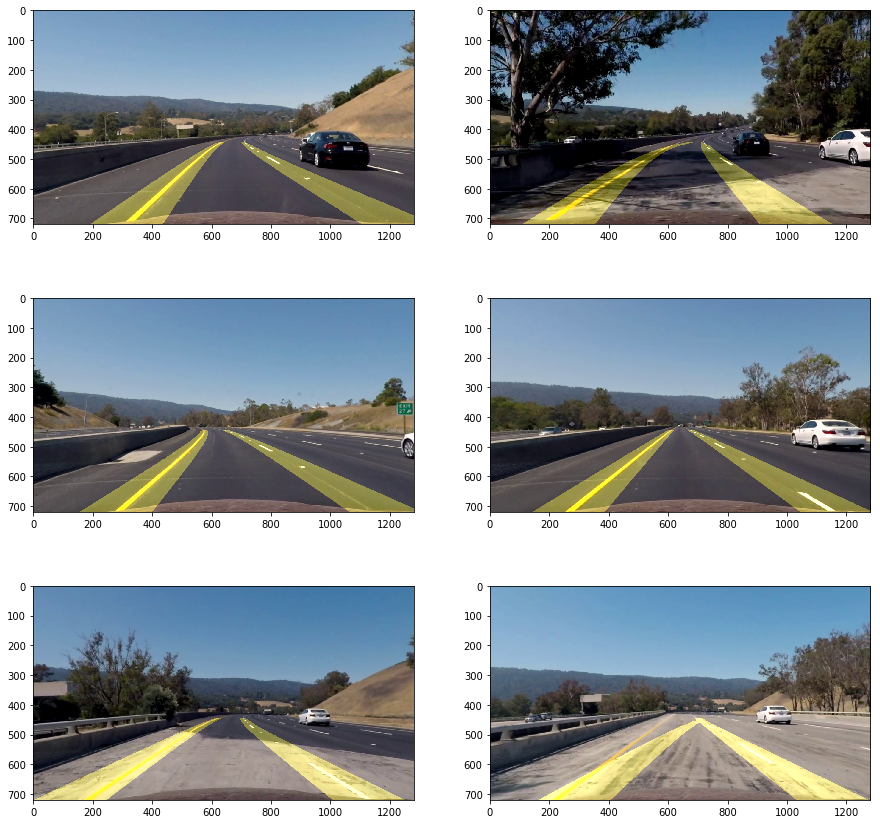

In [9]:
fig = plt.figure(figsize=(15, 15))
images = glob("./edge_thresh_calib/*.jpg")
for i, imgPath in enumerate(images):
    frame = plt.imread(imgPath)
    camModel = loadFile("camCalibMatCoeffs")
    camMtx = camModel["camMtx"]
    dstCoeffs = camModel["dstCoeffs"]
    frame = cv2.undistort(frame, camMtx, dstCoeffs, None, camMtx)
    displayedFrame = frame.copy()
    if os.path.exists("./roiPoly"):
        points = loadFile("./roiPoly")
    if points is not None:
#         drawRoIPoly(displayedFrame, points)
        binaryLanes = getLaneMask(frame, 33, 200, 110, 30, 200)
        birdFrame, birdPoint = warped2BirdPoly(binaryLanes, points, 1280, 720)
        boutImg, leftLinePoints, rightLinePoints = getLanePoints(birdFrame, 11, 175, 55, )
        fitLaneLines(leftLinePoints, rightLinePoints, birdFrame.shape[0], 2)
        linesParams = loadFile("./linesFit")
        outImg, leftLine, rightLine = predictLaneLines(birdFrame, linesParams, margin=100)
        outImg, boundryMask = plotPredictionBoundry(outImg, leftLine, rightLine, margin=100)
        M = cv2.getPerspectiveTransform(birdPoint, np.float32(points))
        noutImg = cv2.warpPerspective(boundryMask, M, (1280, 720), cv2.INTER_LINEAR)
        displayedFrame = cv2.addWeighted(displayedFrame, 1, noutImg, 0.3, 0)
        axis = fig.add_subplot(len(images)//2, 2, i+1)
        axis.imshow(displayedFrame)
    